In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the data/python Docker image: https://github.com/data/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/data/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /data/temp/, but they won't be saved outside of the current session

/data/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/README.md
/data/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet
/data/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet


In [90]:
df=pd.read_parquet('/data/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet')
val_data=pd.read_parquet('/data/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet')



In [91]:
print(df.head(5))
print("*"*100)
print(val_data.head(5))
print("*"*100)
print(df.shape,val_data.shape)

                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
****************************************************************************************************
                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
****************************************************************************************************
(5120, 2) (1280, 2)


<div style="
    background-color: #a0d6b4; 
    color:#002147; 
    padding: 15px; 
    text-align: center; 
    border-radius: 10px;
    font-size: 20px; 
    font-weight: bold;
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.1);">
    Things to Know
</div>

<div class="container">
    <h2>🔍 Understanding the Dataset</h2>
    <p>Our dataset is stored in <span style="background-color: #3498db; color: white; padding: 2px 6px; border-radius: 4px;">Parquet format</span>, which is a binary format that efficiently stores data, including images, in a compressed manner.</p>
    <p>Since image data is stored as <span style="background-color: #3498db; color: white; padding: 2px 6px; border-radius: 4px;">binary bytes</span>, we need to extract and convert it into a NumPy array for processing. Additionally, for visualization, we'll convert these byte codes into actual images.</p>

<h2>Dementia Classification Labels</h2>
<div style="background-color: #ecf0f1; padding: 10px; border-radius: 6px; margin-top: 10px;">
    <p><b>0</b> → Mild Demented</p>
    <p><b>1</b> → Moderate Demented</p>
    <p><b>2</b> → Non-Demented</p>
    <p><b>3</b> → Very Mild Demente</p>
</div>

In [92]:
import cv2
import matplotlib.pyplot as plt

def convert_to_format(bytes_df):
    img_arr=np.frombuffer(bytes_df,dtype=np.uint8) # frombuffer is used to convert the bytes to np.array
    img=cv2.imdecode(img_arr,cv2.IMREAD_COLOR)    # here cv2 imdecode is used for readblity formate and IMREAD_COLOR is used for rgb color format image 
    return img

images=[]

def get_img(df):
    images=[]
    for i in range(len(df)):
        inputt=df.iloc[i]['image']['bytes']
        cv_data=convert_to_format(inputt)
        images.append(cv_data)
    return images

images=get_img(df)

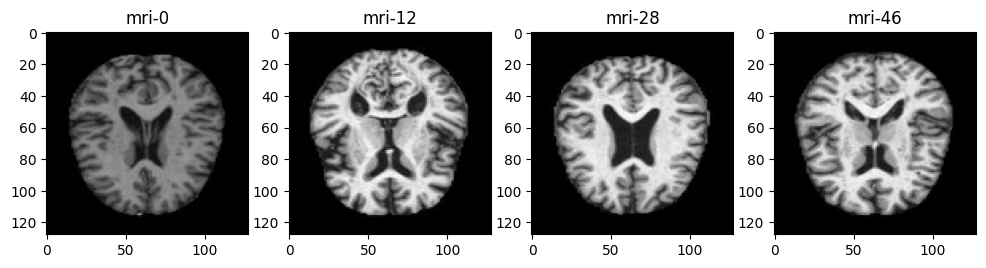

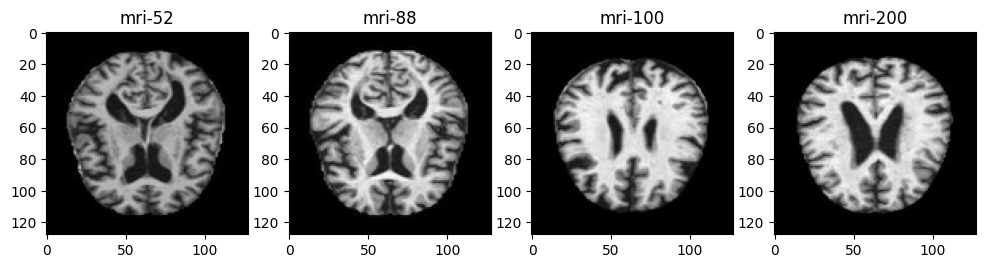

In [93]:

plt.figure(figsize=(12,9))
plt.subplot(241)
plt.imshow(cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB))
plt.title('mri-0')
# should use it kerneal die because of ram by using the cv lib

plt.subplot(242)
plt.imshow(cv2.cvtColor(images[12],cv2.COLOR_BGR2RGB))
plt.title('mri-12')


plt.subplot(243)
plt.imshow(cv2.cvtColor(images[28],cv2.COLOR_BGR2RGB))
plt.title('mri-28')


plt.subplot(244)
plt.imshow(cv2.cvtColor(images[46],cv2.COLOR_BGR2RGB))
plt.title('mri-46')
plt.show() # should use it kerneal die because of ram by using the cv lib

plt.figure(figsize=(12,9))
plt.subplot(241)
plt.imshow(cv2.cvtColor(images[52],cv2.COLOR_BGR2RGB))
plt.title('mri-52')

plt.subplot(242)
plt.imshow(cv2.cvtColor(images[88],cv2.COLOR_BGR2RGB))
plt.title('mri-88')


plt.subplot(243)
plt.imshow(cv2.cvtColor(images[100],cv2.COLOR_BGR2RGB))
plt.title('mri-100')

plt.subplot(244)
plt.imshow(cv2.cvtColor(images[200],cv2.COLOR_BGR2RGB))
plt.title('mri-200')
plt.show()







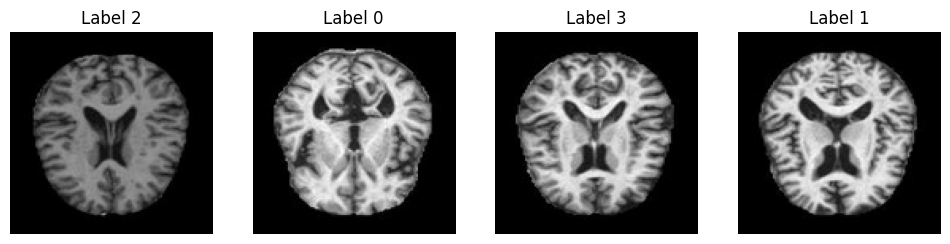

In [94]:
def get_images_per_label(df):
    selected_images = {}  # Dictionary to store one image per label

    for i in range(len(df)):
        label = df.iloc[i]['label']  # Get the label of the current image
        if label not in selected_images:  # Check if this label is already stored
            inputt = df.iloc[i]['image']['bytes']
            cv_data = convert_to_format(inputt)
            selected_images[label] = cv_data  # Store the first found image for this label
        if len(selected_images) == 4:  # Stop when we have all 4 labels
            break

    return selected_images  # Return dictionary with 4 images (one per label)

# Get one MRI image per label
mri_images = get_images_per_label(df)

# Display the images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

for i, (label, img) in enumerate(mri_images.items()):
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Label {label}")
    axes[i].axis("off")    
plt.show()

<div style="background-color:#fff3cd; border-left: 6px solid #ff9800; padding: 15px; margin: 10px 0; font-family: Arial, sans-serif;">
    <h2 style="color:#ff9800;">⚠️ Concerns</h2>
    <ul style="font-size: 16px; color: #333;">
        <li>We have only <strong>5,120</strong> data samples, which might not be sufficient to train a CNN architecture effectively.</li>
        <li>Using <strong>data augmentation</strong> can help increase dataset diversity and improve generalization.</li>
        <li>Optimizing the model through <strong>hyperparameter tuning</strong> may enhance performance.</li>
        <li>This is only an <strong>experiment using data augmentation</strong> for learning purposes for imbalance data.</li>
    </ul>
</div>


In [102]:
df['label'].value_counts()

label
2    2566
3    1781
0     724
1      49
Name: count, dtype: int64

<div style="
    background-color: #f1f8e9;
    color: #333;
    padding: 20px;
    border-radius: 10px;
    font-size: 18px;
    font-weight: bold;
    box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.1); 
    line-height: 1.6;">
    <h3>Addressing Data Imbalance</h3>
    <p>
        One of the significant challenges we face in this dataset is class imbalance. To address this issue, we will implement data augmentation specifically for classes 0 and 1 to help balance the data distribution.  
    </p>
    <p>
        While there are several other techniques available to handle data imbalance, this approach is selected for educational purposes to demonstrate a practical solution.
    </p>
</div>


In [96]:
# now need to agmented only classed o and 1 data 
df_agu=df[df['label'].isin([0,1])]
df_other=df[df['label'].isin([2,3])]


In [97]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import io
from sklearn.model_selection import train_test_split

# Function to convert image bytes to normalized numpy array
def load_and_preprocess_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes)).convert('L')  # Convert to grayscale # here L remover rgb
    img = img.resize((128, 128))  # Resize
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    return img_array

# Separate df_agu (only class 0 and 1) and df_other (class 2 and 3)
df_agu = df[df['label'].isin([0,1])].copy()
df_other = df[df['label'].isin([2,3])].copy()

# Convert images in df_other to image_arr with normalization
df_other['image_arr'] = df_other['image'].apply(lambda img_dict: load_and_preprocess_image(img_dict['bytes']))

#  Augmentation for df_agu
datagen = ImageDataGenerator(
    rotation_range=50, width_shift_range=0.3, height_shift_range=0.3,
    shear_range=0.4, zoom_range=0.6, horizontal_flip=True,fill_mode="nearest"
)

augmented_images = []
augmented_labels = []

# Determine class counts
label_counts = df_agu['label'].value_counts()
max_count = label_counts.max()
new_label_counts = label_counts.copy()

for index, row in df_agu.iterrows():
    image_bytes = row['image']['bytes']
    label = row['label']
    
    # Convert to numpy array and normalize
    img_array = load_and_preprocess_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 1)
    
    # Compute augmentation factor
    current_count = new_label_counts[label]
    if label == 1:
        augment_count = max(500, max_count - current_count)
    elif label == 0:
        augment_count = max(200, max_count - current_count)
    else:
        augment_count = min(max_count - current_count, 20) if current_count < max_count else 0

    # Generate augmented images
    for _ in range(augment_count):
        aug_iter = datagen.flow(img_array, batch_size=1)
        aug_img = next(aug_iter)[0]  # Extract augmented image
        
        # Store augmented images
        augmented_images.append(aug_img)
        augmented_labels.append(label)
        
        # Update class count
        new_label_counts[label] += 1
        if new_label_counts[label] >= max_count:
            break

# Convert df_agu original images to image_arr
df_agu['image_arr'] = df_agu['image'].apply(lambda img_dict: load_and_preprocess_image(img_dict['bytes']))

# Create DataFrame for augmented images
df_agu_augmented = pd.DataFrame({'image_arr': augmented_images, 'label': augmented_labels})

# Merge augmented images with the original dataset
df_final = pd.concat([df_other, df_agu[['image_arr', 'label']], df_agu_augmented], ignore_index=True)

# Print dataset sizes
print(f"Original dataset size: {len(df)}")
print(f"Augmented dataset size: {len(df_final)}")
print(df_final['label'].value_counts())

# Convert to NumPy arrays
X = np.array(df_final['image_arr'].to_list(), dtype=np.float32)
y = np.array(df_final['label'])

# One-hot encode labels
y_onehot = tf.keras.utils.to_categorical(y, num_classes=4)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)    

  # note here we are using stratify to fetch the each propotion to the all classes including imbalnce too.

# Convert to TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(buffer_size=len(X_train)) \
    .batch(32) \
    .prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
    .batch(32) \
    .prefetch(tf.data.AUTOTUNE)

# Print dataset shapes
print(f"Train Dataset: {X_train.shape}, Test Dataset: {X_test.shape}")


Original dataset size: 5120
Augmented dataset size: 6567
label
2    2566
3    1781
0    1448
1     772
Name: count, dtype: int64
Train Dataset: (5253, 128, 128, 1), Test Dataset: (1314, 128, 128, 1)


<div style="
    background-color: #e7f3fe;
    color: #333;
    padding: 20px;
    border-radius: 10px;
    font-size: 18px;
    font-weight: bold;
    box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.1);
    line-height: 1.6;">
    <h3>Addressing Persistent Class Imbalance</h3>
    <p>
        Even after applying data augmentation to class 1, the imbalance in the dataset still exists. Therefore, data augmentation alone is not sufficient. To further address this, we will use <code>class_weights</code> to assign more importance to class 1 during model training, ensuring that it is given more attention in the learning process.
    </p>
</div>


In [98]:
from sklearn.utils.class_weight import compute_class_weight

# Compute default balanced weights
class_weights = compute_class_weight('balanced', classes=[0, 1, 2, 3], y=df_final['label'])
class_weights = dict(enumerate(class_weights))


class_weights[1] *= 1.0
# Increase weight for class 1 (adjust factor as needed)


print("Modified Class Weights:", class_weights)

Modified Class Weights: {0: 1.1338052486187846, 1: 2.1266191709844557, 2: 0.6398090413094311, 3: 0.9218135878719821}


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Increased Dropout
    Dense(4, activation='softmax')  # 4 classes (0,1,2,3)
])

# Compile Model with Lower Learning Rate
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping with Lower Patience
early_stop = EarlyStopping(
    monitor='val_loss',  
    patience=3,  # Lower patience to stop earlier
    restore_best_weights=True  
)

# Train the Model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=100, callbacks=[early_stop],class_weight=class_weights)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.4549 - loss: 1.5634 - val_accuracy: 0.2709 - val_loss: 2.2235
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.5469 - loss: 1.0677 - val_accuracy: 0.2953 - val_loss: 1.7422
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.5840 - loss: 0.9856 - val_accuracy: 0.4696 - val_loss: 1.4129
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6077 - loss: 0.9149 - val_accuracy: 0.5297 - val_loss: 1.0517
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6477 - loss: 0.8479 - val_accuracy: 0.6134 - val_loss: 0.8990
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6529 - loss: 0.8078 - val_accuracy: 0.6020 - val_loss: 0.9359
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.6845 - loss: 0.7747 - val_accuracy: 0.6309 - val_loss: 0.9034
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7252 - loss: 0.6924 - val_accurac

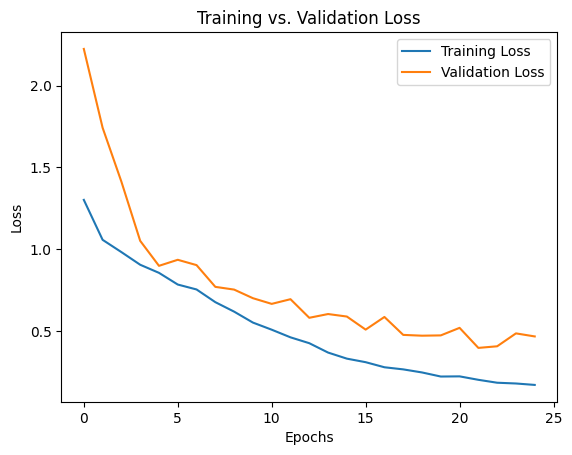

In [100]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()


In [101]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions (class indices)
y_pred_indices = np.argmax(model.predict(test_dataset), axis=1)

# Convert y_true from one-hot to class indices
y_true_indices = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true_indices, y_pred_indices))


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       290
           1       0.75      0.72      0.73       155
           2       0.96      0.93      0.94       513
           3       0.90      0.94      0.92       356

    accuracy                           0.89      1314
   macro avg       0.86      0.86      0.86      1314
weighted avg       0.89      0.89      0.89      1314



<div style="background-color:#f8f9fa; border-left: 6px solid #007bff; padding: 15px; margin: 10px 0; font-family: Arial, sans-serif;">
    <h2 style="color:#007bff;">🔍 Observations</h2>
    <ul style="font-size: 16px; color: #333;">
        <li>We applied data augmentation for imbalanced classes, but this approach might have introduced more variance.</li>
        <li>This experiment is for exploring different techniques and their impact on model performance.</li>
        <li>We can also use techniques like <strong>smoothing, oversampling, or undersampling</strong> to improve accuracy and evaluation metrics.</li>
        <li>Further fine-tuning and balancing techniques might enhance model generalization.</li>
    </ul>
</div>


<div style="background-color:#e3f2fd; border-left: 6px solid #1976d2; padding: 15px; margin: 10px 0; font-family: Arial, sans-serif;">
    <h2 style="color:#1976d2;">📌 Topics for Further Improvement</h2>
    <ul style="font-size: 16px; color: #333;">
        <li><strong>Transfer Learning:</strong> Explore <strong>Feature Extraction</strong> and <strong>Fine-Tuning</strong> techniques.</li>
        <li><strong>Keras Tuner:</strong> Optimize hyperparameters efficiently for better model performance.</li>
        <li><strong>Handling Imbalanced Data:</strong> Investigate various techniques such as <strong>SMOTE, Random Oversampling, Undersampling.</strong></li>
        <li><strong>Pretrained Models:</strong> Implement models like <strong>VGG16, ResNet, MobileNet, and EfficientNet</strong> for better feature extraction and transfer learning.</li>
    </ul>
</div>


# test data

In [104]:
# Function to preprocess new unseen test images
def preprocess_new_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes)).convert('L')  # Convert to grayscale
    img = img.resize((128, 128))  # Resize
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize (1./255)
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    return img_array

# Apply preprocessing to validation/test dataset
val_data['image_arr'] = val_data['image'].apply(lambda img_dict: preprocess_new_image(img_dict['bytes']))

# Convert to NumPy array
X_val = np.array(val_data['image_arr'].to_list(), dtype=np.float32)
y_val = np.array(val_data['label'])

# One-hot encode labels
y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes=4)

# Create TensorFlow dataset for evaluation
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_onehot)) \
    .batch(32) \
    .prefetch(tf.data.AUTOTUNE)

# Evaluate model on unseen test data
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_acc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9437 - loss: 0.2973
Test Accuracy: 0.9461


<div style="background-color:#e6f7ff; border-left: 6px solid #0073e6; padding: 15px; margin: 10px 0; font-family: Arial, sans-serif;">
    <h2 style="color:#0073e6;"> Note</h2>
    <p style="font-size: 16px; color: #333;">
         We were able to achieve an accuracy of <strong>94%</strong> on unseen


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


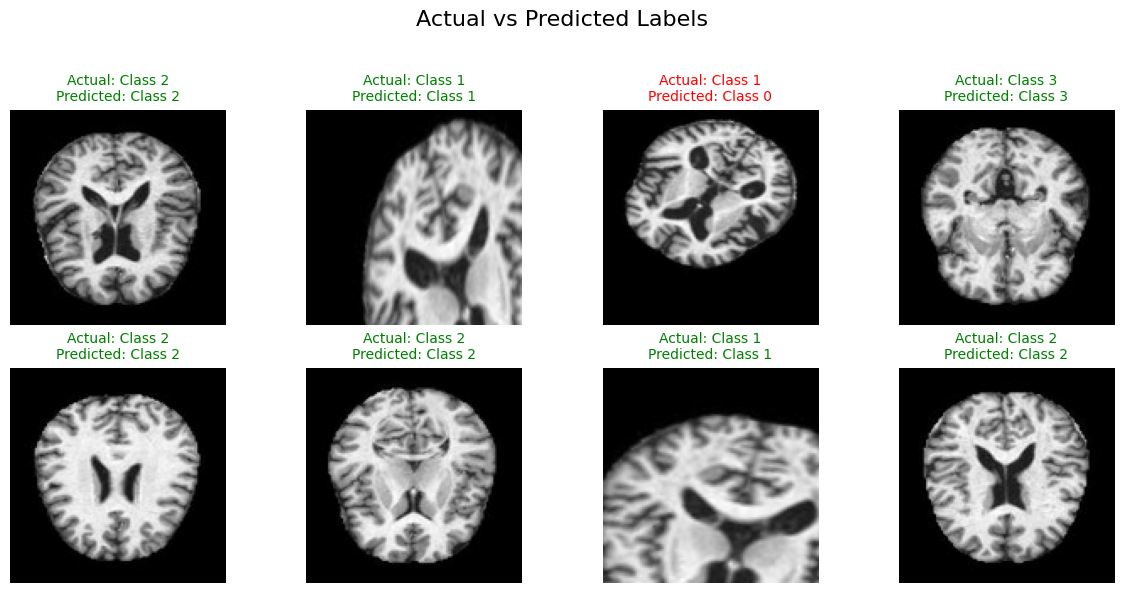

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Select 8 random indices from the validation set
num_samples = 8
random_indices = random.sample(range(len(X_test)), num_samples)

# Extract the images and actual labels
random_images = X_test[random_indices]
actual_labels = np.argmax(y_test[random_indices], axis=1)  # Convert one-hot labels to class index

# Get model predictions
predicted_labels = np.argmax(model.predict(random_images), axis=1)

# Define class names (Modify this based on your dataset)
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]

# Plot the images with actual and predicted labels
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Actual vs Predicted Labels", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = np.squeeze(random_images[i])  # Remove extra dimensions if needed
    ax.imshow(img, cmap="gray")  # Change 'gray' if images are in color
    ax.axis("off")

    # Title with actual and predicted class
    actual_class = class_names[actual_labels[i]]
    predicted_class = class_names[predicted_labels[i]]
    
    title_color = "green" if actual_labels[i] == predicted_labels[i] else "red"
    ax.set_title(f"Actual: {actual_class}\nPredicted: {predicted_class}", color=title_color, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
@dataset{alzheimer_mri_dataset,
  author = {for Patent},
  title = {Alzheimer MRI Dataset},
  year = {2025},
  publisher = {Hugging Face},
  version = {1.0},
  url = {https://huggingface.co/datasets/Falah/Alzheimer_MRI}
}